In [20]:
import numpy as np
import pandas as pd
import matplotlib
print(matplotlib.__version__)
matplotlib.use('PDF')
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.lines as mlines
from glob import glob
from collections import Counter
import ns
import history_cmc as hic
import seaborn as sns
import math
import scipy
from scipy import stats
import matplotlib.cm as cm
import matplotlib as mpl
from random import shuffle
import ecc_calc as gwcalc
import unit_convert
import readdata_harris as rd

%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})

twopi=2.*np.pi
yearsc=3.1557*10**7
figsave='/projects/b1011/syr904/projects/SGRB'
Kconst=9.87*10**-48 ##yr/G^2
Gconst=6.674*10**-8 ##cm3*g-1*s-2
clight=3*10**10 ##cm/s
Msun=2*10**33 ##gram
AU=1.496*10**13  ##cm
PC=3.086*10**18  ##cm

savepath='/projects/b1011/syr904/projects/SGRB/newruns'

1.5.1


/software/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
##Read the data of the new models
data=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/table_allnums.txt')
Nini=data[:,1]; rvini=data[:,2]; zini=data[:,3]; rgini=data[:,4]
rc=data[:,5]; rhl=data[:,6]; mtot=data[:,7]; Nbh=data[:,8]; Nns=data[:,9]; Npsr=data[:,10]; Nmsp=data[:,11]
Ngwcap=data[:,12]; Nincluster=data[:,13]; Nesc=data[:,14]; Nescmerge=data[:,15]; DNS=data[:,16]; NSBH=data[:,17]

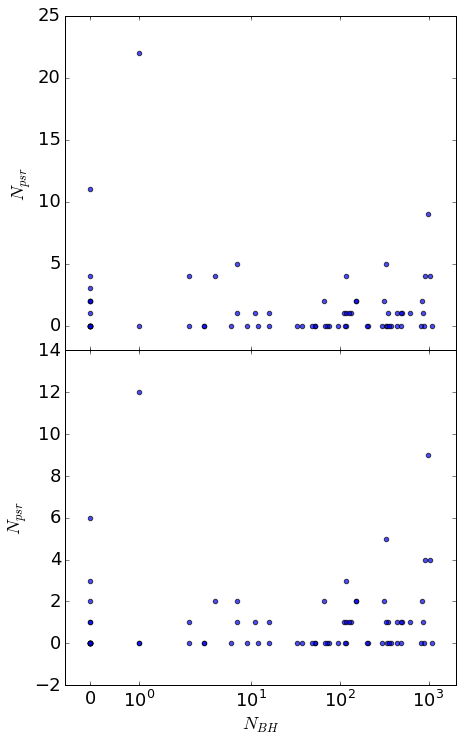

In [19]:
##Nbh vs. Npsr
plt.rcParams['figure.figsize'] = [7, 12]
fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

ax1.scatter(Nbh, Npsr, s=20, alpha=0.7)
ax1.set_xscale('symlog')
#ax1.set_yscale('symlog')
ax1.set_ylim(-2, 25)
ax1.set_xlim(-0.5, 2000)
ax1.set_xlabel(r'$N_{BH}$')
ax1.set_ylabel(r'$N_{psr}$')

ax2.scatter(Nbh, Nmsp, s=20, alpha=0.7)
ax2.set_xscale('symlog')
#ax2.set_yscale('symlog')
#ax2.set_ylim(-2, 25)
ax2.set_xlim(-0.5, 2000)
ax2.set_xlabel(r'$N_{BH}$')
ax2.set_ylabel(r'$N_{psr}$')


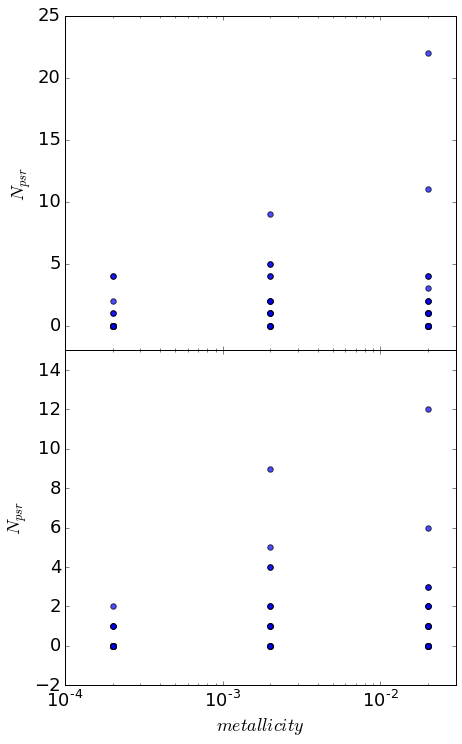

In [27]:
##Z vs. Npsr
plt.rcParams['figure.figsize'] = [7, 12]
fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

ax1.scatter(zini, Npsr, s=30, alpha=0.7)
ax1.set_xscale('log')
#ax1.set_yscale('symlog')
ax1.set_ylim(-2, 25)
ax1.set_xlim(0.0001, 0.03)
ax1.set_xlabel(r'$metallicity$')
ax1.set_ylabel(r'$N_{psr}$')

ax2.scatter(zini, Nmsp, s=30, alpha=0.7)
ax2.set_xscale('log')
#ax2.set_yscale('symlog')
ax2.set_ylim(-2, 15)
ax2.set_xlim(0.0001, 0.03)
ax2.set_xlabel(r'$metallicity$')
ax2.set_ylabel(r'$N_{psr}$')


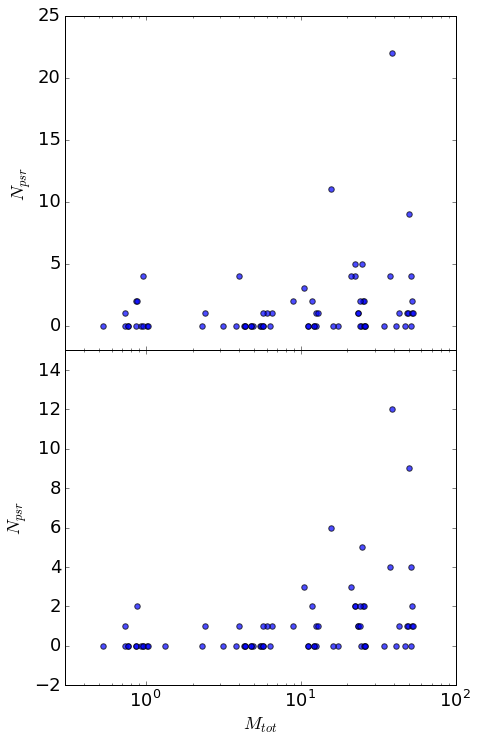

In [32]:
##Mtot vs. Npsr
plt.rcParams['figure.figsize'] = [7, 12]
fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

ax1.scatter(mtot, Npsr, s=30, alpha=0.7)
ax1.set_xscale('log')
#ax1.set_yscale('symlog')
ax1.set_ylim(-2, 25)
ax1.set_xlim(0.3, 100)
ax1.set_xlabel(r'$m_{tot}y$')
ax1.set_ylabel(r'$N_{psr}$')

ax2.scatter(mtot, Nmsp, s=30, alpha=0.7)
ax2.set_xscale('log')
#ax2.set_yscale('symlog')
ax2.set_ylim(-2, 15)
ax2.set_xlim(0.3, 100)
ax2.set_xlabel(r'$M_{tot}$')
ax2.set_ylabel(r'$N_{psr}$')


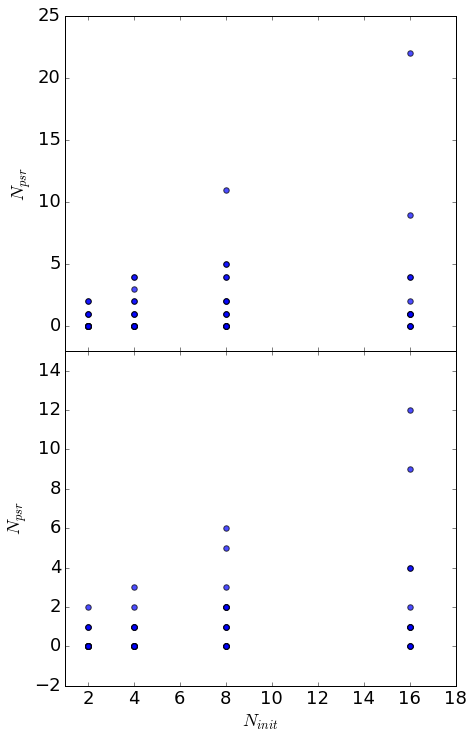

In [5]:
##N vs. Npsr
plt.rcParams['figure.figsize'] = [7, 12]
fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

ax1.scatter(Nini, Npsr, s=30, alpha=0.7)
#ax1.set_xscale('log')
#ax1.set_yscale('symlog')
ax1.set_ylim(-2, 25)
ax1.set_xlim(1, 18)
ax1.set_xlabel(r'$N _{init}$')
ax1.set_ylabel(r'$N_{psr}$')

ax2.scatter(Nini, Nmsp, s=30, alpha=0.7)
#ax2.set_xscale('log')
#ax2.set_yscale('symlog')
ax2.set_ylim(-2, 15)
ax2.set_xlim(1, 18)
ax2.set_xlabel(r'$N_{init}$')
ax2.set_ylabel(r'$N_{psr}$')

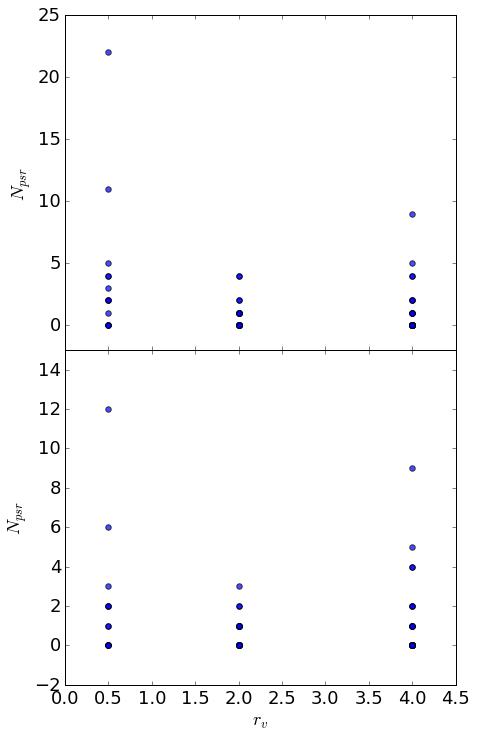

In [5]:
##N vs. Npsr
plt.rcParams['figure.figsize'] = [7, 12]
fig, (ax1, ax2)=plt.subplots(nrows=2, sharex=True)
fig.subplots_adjust(hspace=0)

ax1.scatter(rvini, Npsr, s=30, alpha=0.7)
#ax1.set_xscale('log')
#ax1.set_yscale('symlog')
ax1.set_ylim(-2, 25)
#ax1.set_xlim(1, 18)
ax1.set_xlabel(r'r _v$')
ax1.set_ylabel(r'$N_{psr}$')

ax2.scatter(rvini, Nmsp, s=30, alpha=0.7)
#ax2.set_xscale('log')
#ax2.set_yscale('symlog')
ax2.set_ylim(-2, 15)
#ax2.set_xlim(1, 18)
ax2.set_xlabel(r'$r_v$')
ax2.set_ylabel(r'$N_{psr}$')

Nbw= 4 Nnormal= 0 Nexotica= 2 Nsingle= 3


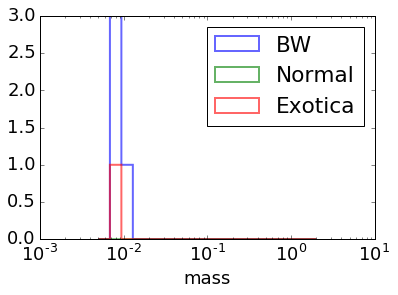

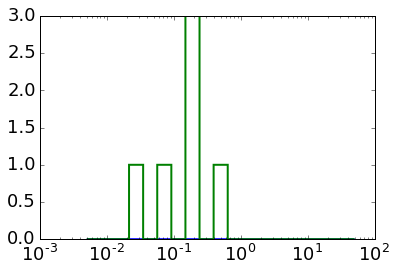

In [3]:
##Type of MSPs for old models
datamsp_old=np.genfromtxt('/projects/b1095/syr904/projects/NGC6624/msps_438.dat')
datapsr_old=np.genfromtxt('/projects/b1095/syr904/projects/NGC6624/normalpsrs_438.dat')
m0_msp=datamsp_old[:,6]; m1_msp=datamsp_old[:,7]; sma_msp=datamsp_old[:,10]; ecc_msp=datamsp_old[:,11]
r_msp=datamsp_old[:,17]
m0_psr=datapsr_old[:,6]; m1_psr=datapsr_old[:,7]; sma_psr=datapsr_old[:,10]; ecc_psr=datapsr_old[:,11]
r_psr=datapsr_old[:,17]

m_bw=[]; m_normal=[]; m_exotica=[]; m_single=[]
r_bw=[]; r_normal=[]; r_exotica=[]; r_single=[]
a_bw=[]; a_normal=[]; a_exotica=[]
r_light=[]; r_heavy=[]

for i in range(len(m0_msp)):
    if m1_msp[i]>=0.1 and ecc_msp[i]<=0.01:
        m_normal.append(m1_msp[i])
        r_normal.append(r_msp[i])
        r_heavy.append(r_msp[i])
    if m1_msp[i]<0.1 and m1_msp[i]>0 and ecc_msp[i]<=0.01:
        m_bw.append(m1_msp[i])
        r_bw.append(r_msp[i])
        r_light.append(r_msp[i])
    if ecc_msp[i]>0.01:
        m_exotica.append(m1_msp[i])
        r_exotica.append(r_msp[i])
        if m1_msp[i]>=0.1:
            r_heavy.append(r_msp[i])
        if m1_msp[i]<0.1 and m1_msp[i]>0:
            r_light.append(r_msp[i])
    if m1_msp[i]==-100:
        m_single.append(m1_msp[i])
        r_single.append(r_msp[i])
        
for j in range(len(m0_psr)):
    if m1_psr[j]>=0.1 and ecc_psr[j]<=0.01:
        m_normal.append(m1_psr[j])
        r_normal.append(r_psr[j])
        r_heavy.append(r_psr[j])
    if m1_psr[j]<0.1 and m1_psr[j]>0 and ecc_psr[j]<=0.01:
        m_bw.append(m1_psr[j])
        r_bw.append(r_psr[j])
        r_light.append(r_psr[j])
    if ecc_psr[j]>0.01:
        m_exotica.append(m1_psr[j])
        r_exotica.append(r_psr[j])
        if m1_psr[j]>=0.1:
            r_heavy.append(r_psr[j])
        if m1_psr[j]<0.1 and m1_psr[j]>0:
            r_light.append(r_psr[j])
    if m1_psr[j]==-100:
        m_single.append(m1_psr[j])
        r_single.append(r_psr[j])
    

print 'Nbw=',len(m_bw), 'Nnormal=', len(m_normal), 'Nexotica=', len(m_exotica), 'Nsingle=', len(m_single)


plt.figure()
plt.hist(m_bw, bins=np.logspace(np.log10(0.005),np.log10(2), 20),  histtype='step', lw=2, label='BW', alpha=0.6)
plt.hist(m_normal, bins=np.logspace(np.log10(0.005),np.log10(2), 20), histtype='step', lw=2, label='Normal', alpha=0.6)
plt.hist(m_exotica, bins=np.logspace(np.log10(0.005),np.log10(2), 20), histtype='step', lw=2, label='Exotica', alpha=0.6)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('mass')
plt.legend(loc='upper right')

plt.figure()
plt.hist(r_heavy, bins=np.logspace(np.log10(0.005),np.log10(50), 20), histtype='step', lw=2)
plt.hist(r_light, bins=np.logspace(np.log10(0.005),np.log10(50), 20), histtype='step', lw=2)
plt.xscale('log')

In [3]:
def addColorbar(
    ax,cmap,
    vmin,vmax,
    label,logflag = 0,
    fontsize=16,cmap_number=0,
    tick_tuple=None):
    if logflag:
        from matplotlib.colors import LogNorm as norm
        ticks = np.linspace(np.log10(vmin),np.log10(vmax),5,endpoint=True)
        tick_labels= [r"$10^{%.1f}$"%tick for tick in ticks]
        ticks = 10**ticks
    else:
        from matplotlib.colors import Normalize as norm
        ticks = np.linspace(vmin,vmax,5,endpoint=True)
        tick_labels= ticks
    
    if tick_tuple is not None:
        ticks,tick_labels = tick_tuple

    fig = ax.get_figure()
    
    ## x,y of bottom left corner, width,height in percentage of figure size
    ## matches the default aspect ratio of matplotlib
    cur_size = fig.get_size_inches()*fig.dpi        

    cur_height = cur_size[1]
    cur_width = cur_size[0]
    offset = 0.00 + cmap_number*(25/cur_width+50/cur_width)

    ax1 = fig.add_axes([0.91 + offset, 0.135, 25./cur_width, 0.75])

    cb1 = matplotlib.colorbar.ColorbarBase(
        ax1, cmap=cmap,
        #extend='both',
        extendfrac=0.05,
        norm=norm(vmin=vmin,vmax=vmax),
        orientation='vertical')


    #cb1.set_label(label,fontsize=fontsize)

    cb1.set_ticks(ticks)
    cb1.set_ticklabels(tick_labels)
    cb1.ax.tick_params(labelsize=fontsize-2)
    return cb1,ax1

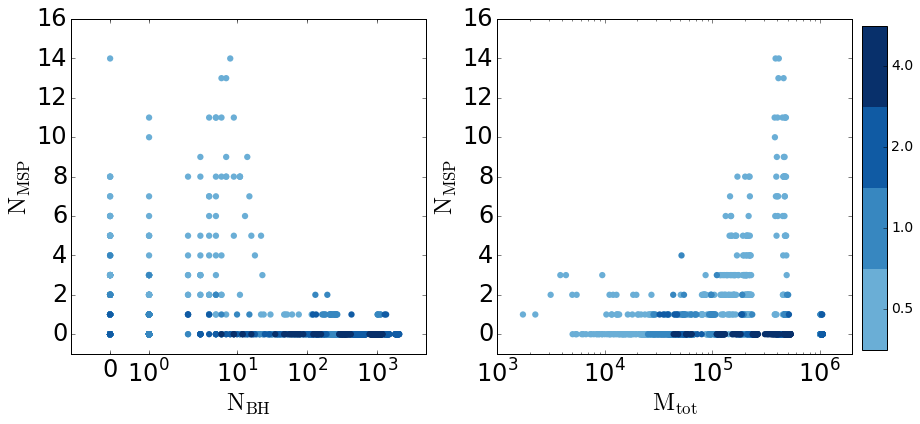

In [25]:
##Plot Npsr vs Nbh and Npsr vs Ninit
data=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/ns_number_9to14Gyr_main_32e5.dat')

Models=data[:,0]; Nbh=data[:,3]; Npsr=data[:,8]; Nmsp=data[:,11]
Ninit=data[:,14]; rv=data[:,15]; z=data[:,16]; rg=data[:,17]
times=data[:,1]; Mtot=data[:,2]

Npsr_all=[]; Nmsp_all=[]; Ninit_all=[]; Nbh_all=[]; Mtot_all=[]
RV=[0.5, 1.0, 2.0, 4.0]
for i in range(4):
    Npsr_all.append([]); Nmsp_all.append([]); Ninit_all.append([]); Nbh_all.append([]); Mtot_all.append([])
    for j in range(len(Models)):
        if rv[j]==RV[i] and 10.<=times[j]<=13.:
            Npsr_all[i].append(Npsr[j]); Nmsp_all[i].append(Nmsp[j])
            Ninit_all[i].append(Ninit[j]); Nbh_all[i].append(Nbh[j])
            Mtot_all[i].append(Mtot[j])

matplotlib.rcParams.update({'font.size': 24})
plt.rcParams['figure.figsize'] = [14, 6]   

c = cm.Blues(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([c[0], c[1], c[2], c[3]])


fig, (ax1, ax2)=plt.subplots(ncols=2)
for k in range(4):
    ax1.scatter(Nbh_all[k], Nmsp_all[k], s=40, color=c[k], cmap=cmap, edgecolors='none')
    ax2.scatter(Mtot_all[k], Nmsp_all[k], s=40, color=c[k], cmap=cmap, edgecolors='none')

addColorbar(ax2, cmap, 0, 8, label=None, tick_tuple=([1.,3.,5.,7.],[0.5, 1.0, 2.0, 4.0]))

ax1.set_xscale('symlog')
ax2.set_xscale('log')
ax1.set_xlim(-1, 5000)
ax2.set_xlim(1e3, 2*1e6)
ax1.set_ylim(-1.0, 16)
ax2.set_ylim(-1.0, 16)

ax1.set_xlabel(r'$\rm{N_{BH}}$')
ax1.set_ylabel(r'$\rm{N_{MSP}}$')
ax2.set_xlabel(r'$\rm{M_{tot}}$')
ax2.set_ylabel(r'$\rm{N_{MSP}}$')

#plt.tight_layout()

plt.savefig('/projects/b1095/syr904/projects/PULSAR2/NpsrvsNbh_v3.pdf', dpi=fig.dpi, bbox_inches='tight')

5.2 2.7
5.68421052632 2.84210526316
9.72727272727 0.454545454545
9.04761904762 2.85714285714
20.2777777778 8.88888888889
0.175438596491 0.175438596491
7.27272727273 2.63636363636
0.0 0.0
1.47619047619 1.38095238095
5.17647058824 2.41176470588
6.07692307692 0.0769230769231
0.0952380952381 0.047619047619
4.46428571429 1.57142857143
14.0869565217 6.26086956522
0.2 0.2
1.12030075188 0.12030075188
4.66666666667 3.61111111111
1.0 0.0
1.17647058824 0.176470588235
3.0 1.0
14.0 0.142857142857
0.0 0.0
3.52941176471 0.294117647059
4.33333333333 2.14285714286
15.3333333333 6.33333333333
0.40625 0.40625
0.0 0.0
1.0 0.0
1.55555555556 0.888888888889
1.0 0.0
3.0 0.0
0.947368421053 0.410526315789
1.9 0.8
2.36363636364 0.0909090909091
0.0 0.0
2.65 0.5
1.0 0.0
4.0 0.0
0.0952380952381 0.0952380952381
0.0 0.0
0.0 0.0
3.85 0.85
0.1 0.0
2.66666666667 0.444444444444
1.625 0.375
3.1 0.9
0.0 0.0
2.16666666667 0.416666666667
0.0 0.0
1.0 0.0
0.0 0.0
1.0 0.0
0.0 0.0
4.78947368421 0.0
1.0 1.0
1.0 0.0
2.33333333333 

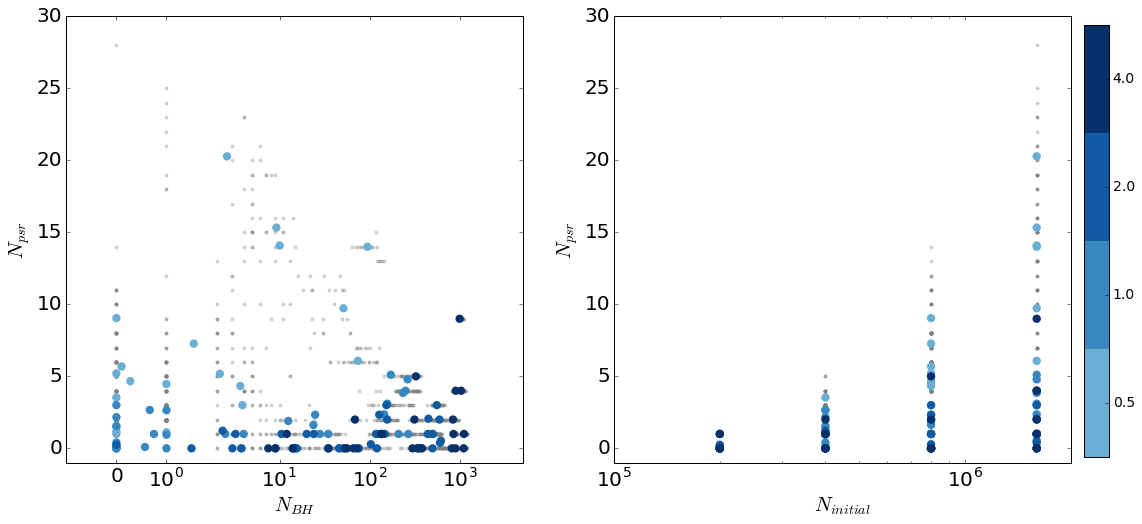

In [106]:
##Plot Npsr vs Nbh and Npsr vs Ninit with average numbers
sourcedir=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/path_nondissolved_newruns.dat', dtype='str')
data=np.genfromtxt('/projects/b1095/syr904/projects/SGRB/newruns/finaldata/ns_number_9to12Gyr_maingrid.dat')

Models=data[:,0]; Nbh=data[:,3]; Npsr=data[:,8]; Nmsp=data[:,11]; time=data[:,1]
Ninit=data[:,14]; rv=data[:,15]; z=data[:,16]; rg=data[:,17]

all_modelno=Counter(Models).keys()
Npsr_all=[]; Nmsp_all=[]; Ninit_all=[]; Nbh_all=[]
RV=[0.5, 1.0, 2.0, 4.0]
for i in range(4):
    Npsr_all.append([]); Nmsp_all.append([]); Ninit_all.append([]); Nbh_all.append([])
    for j in range(len(all_modelno)):
        Npsr_sum=0; Nmsp_sum=0; Nbh_sum=0
        count=0
        for k in range(len(Models)):
            if Models[k]==all_modelno[j]:
                if 10.0<=time[k]<=14.0:
                    Npsr_sum=Npsr_sum+Npsr[k]; Nmsp_sum=Nmsp_sum+Nmsp[k]; Nbh_sum=Nbh_sum+Nbh[k]
                    count+=1
                    rv_model=rv[k]; Ninit_model=Ninit[k]
        Npsr_ave=float(Npsr_sum)/float(count); Nmsp_ave=float(Nmsp_sum)/float(count); Nbh_ave=float(Nbh_sum)/float(count)
        
        if rv_model==RV[i]:
            Npsr_all[i].append(Npsr_ave); Nmsp_all[i].append(Nmsp_ave)
            Ninit_all[i].append(Ninit_model); Nbh_all[i].append(Nbh_ave)


matplotlib.rcParams.update({'font.size': 20})
plt.rcParams['figure.figsize'] = [18, 8]   
c = cm.Blues(np.linspace(0.5, 1, 4))
cmap=matplotlib.colors.ListedColormap([c[0], c[1], c[2], c[3]])
fig, (ax1, ax2)=plt.subplots(ncols=2)
for k in range(4):
    ax1.scatter(Nbh_all[k], Npsr_all[k], edgecolor='None', s=70, color=c[k], zorder=2)
    ax2.scatter(Ninit_all[k], Npsr_all[k], edgecolor='None', s=70, color=c[k], zorder=2)

ax1.scatter(Nbh, Npsr, color='grey', s=8, alpha=0.3, zorder=1)
ax2.scatter(Ninit, Npsr, color='grey', s=8, alpha=0.3, zorder=1)

addColorbar(ax2, cmap, 0, 8, label=None, tick_tuple=([1.,3.,5.,7.],[0.5, 1.0, 2.0, 4.0]))


ax1.set_xscale('symlog')
ax2.set_xscale('log')
ax1.set_xlim(-1, 5000)
ax2.set_xlim(1e5, 2*1e6)
ax1.set_ylim(-1.0, 30)
ax2.set_ylim(-1.0, 30)

ax1.set_xlabel(r'$N_{BH}$')
ax1.set_ylabel(r'$N_{psr}$')
ax2.set_xlabel(r'$N_{initial}$')
ax2.set_ylabel(r'$N_{psr}$')